In [4]:
from quantopian.pipeline import Pipeline
from quantopian.research import run_pipeline
from quantopian.pipeline.filters.morningstar import Q1500US
from quantopian.pipeline.data.sentdex import sentiment
from quantopian.pipeline.data.morningstar import operation_ratios

def make_pipeline():
    # Yes: operation_ratios.revenue_growth, operation_ratios.operation_margin, sentiment
    
    testing_factor = sentiment.sentiment_signal.latest
    universe = (Q1500US() &
               testing_factor.notnull())
    
    testing_factor = testing_factor.rank(mask=universe, method='average')
    
    pipe = Pipeline(columns={'testing_factor':testing_factor},
                   screen=universe)
    return pipe

result = run_pipeline(make_pipeline(), start_date='2015-01-01', end_date='2016-01-01')
result.head()

testing_factor
2015-01-02 00:00:00+00:00 Equity(2 [ARNC])            349.0
                          Equity(24 [AAPL])           349.0
                          Equity(62 [ABT])            282.0
                          Equity(67 [ADSK])           487.5
                          Equity(76 [TAP])             32.5

In [5]:
assets = result.index.levels[1].unique()
pricing = get_pricing(assets, start_date='2014-12-01', end_date='2016-02-01', fields='open_price')
len(assets)

522

Returns Analysis


3      10     30
Ann. alpha                                     0.027  0.026  0.020
beta                                          -0.021 -0.033 -0.071
Mean Period Wise Return Top Quantile (bps)     1.094  1.025  0.947
Mean Period Wise Return Bottom Quantile (bps) -0.672 -0.629 -0.583
Mean Period Wise Spread (bps)                  1.870  1.776  1.649

Information Analysis


3      10     30
IC Mean      0.011  0.020  0.030
IC Std.      0.064  0.060  0.065
t-stat(IC)   2.763  5.180  7.192
p-value(IC)  0.006  0.000  0.000
IC Skew      0.077 -0.006  0.516
IC Kurtosis -0.266 -0.475  0.263
Ann. IR      2.820  5.286  7.339

Turnover Analysis


1
Quantile 1 Mean Turnover   0.03
Quantile 2 Mean Turnover   0.05

1
Mean Factor Rank Autocorrelation  0.894

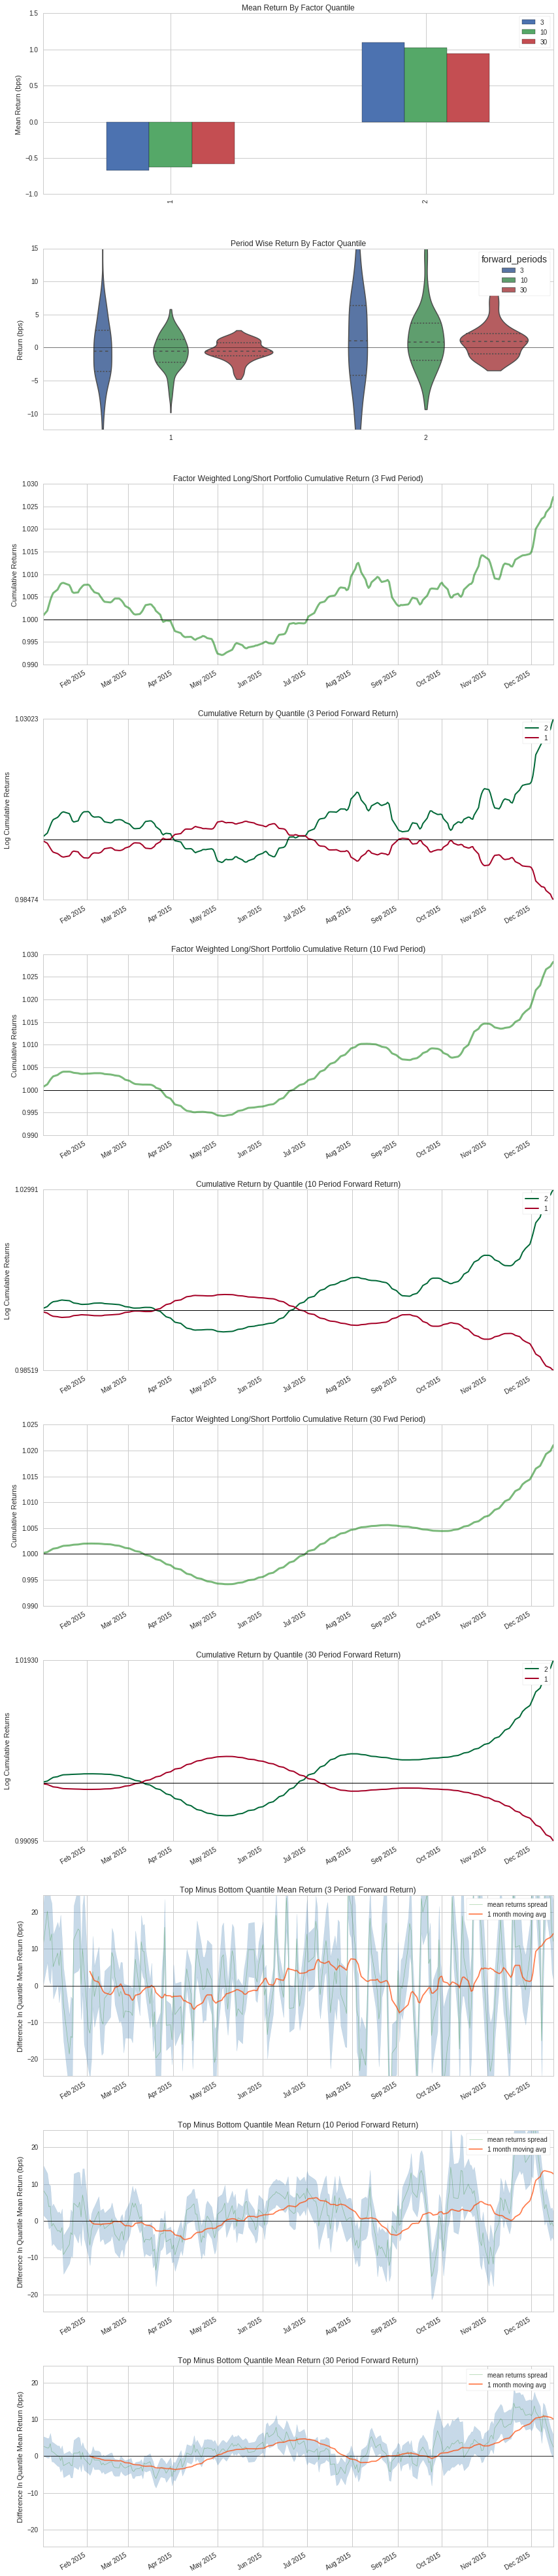

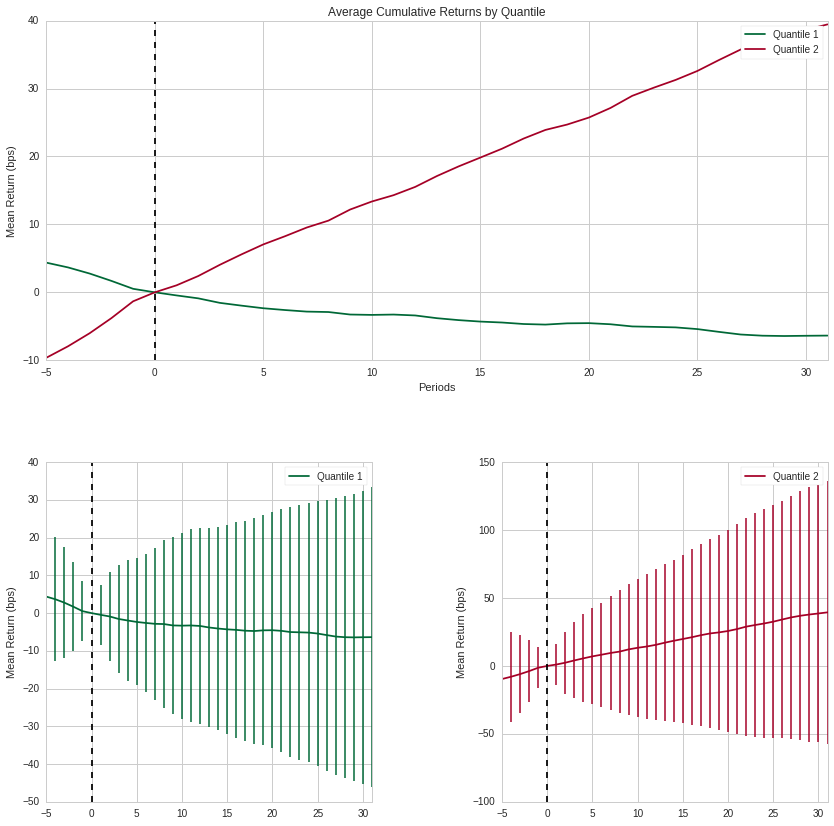

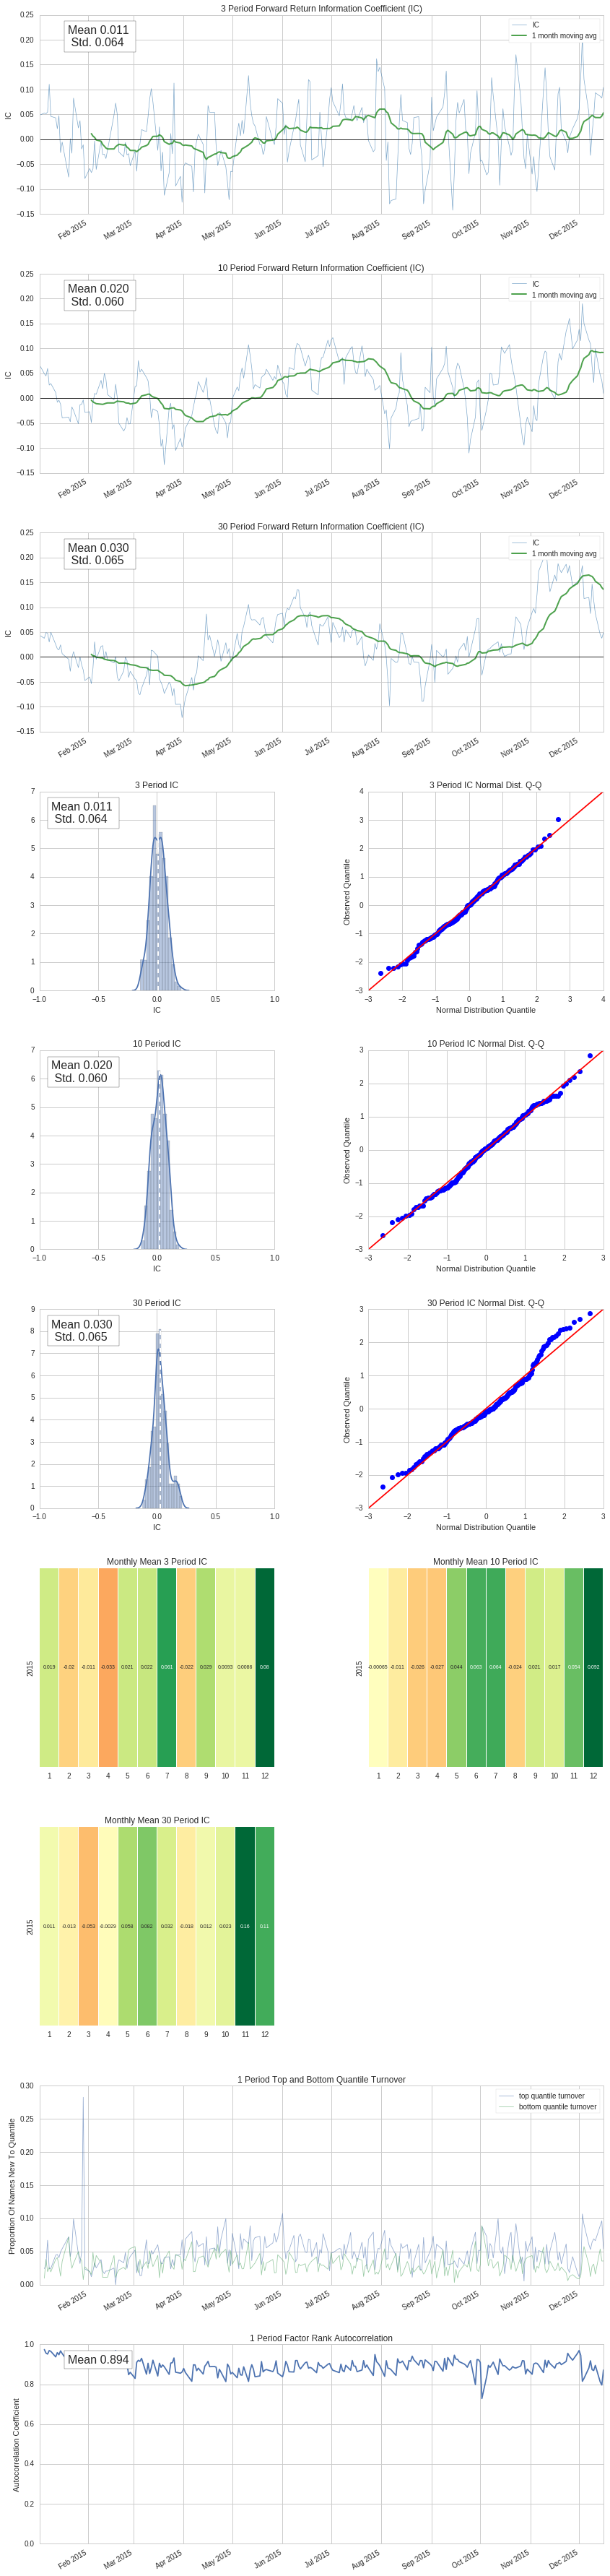

In [6]:
import alphalens

alphalens.tears.create_factor_tear_sheet(factor = result['testing_factor'],
                                        prices = pricing,
                                        quantiles = 2,
                                        periods = (3, 10, 30))